# Exercise
- Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

- For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [5]:
from cgi import test
from lib2to3.pgen2.pgen import DFAState
from lib2to3.refactor import get_all_fix_names
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pydataset import data
import scipy
import os
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
import acquire
import prepare

***

## HEB store data as df

In [2]:
#importing heb aka item data set
df = acquire.HEB_data()

In [3]:
#importing preped functions and converting data set from above
df = prepare.prep_store_data(df)
df

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,01-Jan,2-Tue,10.92
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,01-Jan,2-Tue,218.40
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,01-Jan,2-Tue,125.55
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,01-Jan,2-Tue,453.60
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,01-Jan,2-Tue,294.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,34,21.0,619014,9,735 SW Military Dr,San Antonio,9,TX,78221,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic Drops Honey-lemon - 30 Ct,4.17,312546628694,312546628694,12-Dec,0-Sun,87.57
2017-12-31,34,32.0,620840,10,8503 NW Military Hwy,San Antonio,10,TX,78231,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic Drops Honey-lemon - 30 Ct,4.17,312546628694,312546628694,12-Dec,0-Sun,133.44
2017-12-31,35,55.0,622666,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Natures Way,35,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066,12-Dec,0-Sun,285.45


In [4]:
df.describe()

,item,sale_amount,sale_id,store,store_id,store_zipcode,item_id,item_price,item_upc12,item_upc14,sales_total
count,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,9.130000e+05,9.130000e+05,913000.000000
mean,25.500000,52.250287,456500.500000,5.500000,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,280.898866
std,14.430878,28.801144,263560.542223,2.872283,2.872283,16.479087,14.430878,2.737764,2.978005e+11,2.978005e+11,227.686575
min,1.000000,0.000000,1.000000,1.000000,1.000000,78201.000000,1.000000,0.600000,8.500005e+09,8.500005e+09,0.000000
25%,13.000000,30.000000,228250.750000,3.000000,3.000000,78217.000000,13.000000,2.970000,3.367410e+10,3.367410e+10,98.010000
50%,25.500000,47.000000,456500.500000,5.500000,5.500000,78220.500000,25.500000,5.195000,7.103651e+10,7.103651e+10,233.280000
75%,38.000000,70.000000,684750.250000,8.000000,8.000000,78232.000000,38.000000,7.520000,6.030842e+11,6.030842e+11,402.780000
max,50.000000,231.000000,913000.000000,10.000000,10.000000,78253.000000,50.000000,9.640000,8.846237e+11,8.846237e+11,2104.410000


In [6]:
# Train test split:
train = df[:'2016']
test = df['2017']

<AxesSubplot:xlabel='sale_date'>

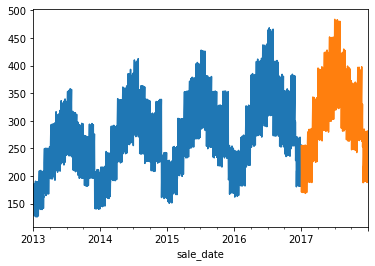

In [7]:
# Visualize the split data:

train.resample('D').sales_total.mean().plot()
test.resample('D').sales_total.mean().plot()

In [8]:
# y is the resampled daily data:

y = train.resample('D').sales_total.mean()
y.head()

sale_date
2013-01-01    147.68802
2013-01-02    147.14116
2013-01-03    156.33896
2013-01-04    168.93546
2013-01-05    175.24370
Freq: D, Name: sales_total, dtype: float64

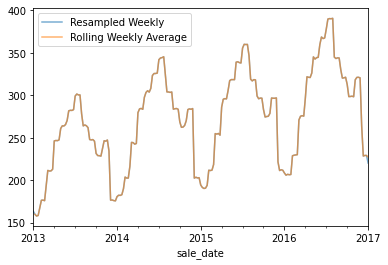

In [9]:
# Plot the weekly average & the 7-day moving average. Compare the 2 plots.

y.resample('W').mean().plot(label='Resampled Weekly', alpha=.6)
y.rolling(7).mean().plot(label='Rolling Weekly Average', alpha=.6)
plt.legend()

Text(0, 0.5, 'Difference in sales from one day to the next')

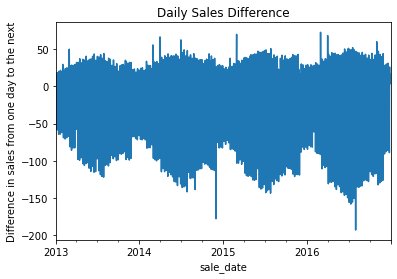

In [10]:
# Plot the daily difference. 
# Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

y.diff().plot()
plt.title('Daily Sales Difference')
plt.ylabel('Difference in sales from one day to the next')

Text(0, 0.5, '% Change')

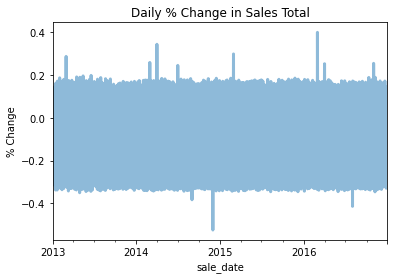

In [12]:
#Maybe it would be helpful to look at percent change as well:

(y.diff() / y.shift()).plot(alpha=.5, lw=3)
plt.title('Daily % Change in Sales Total')
plt.ylabel('% Change')

[Text(0.5, 1.0, 'Monthly % Change in Sales Total')]

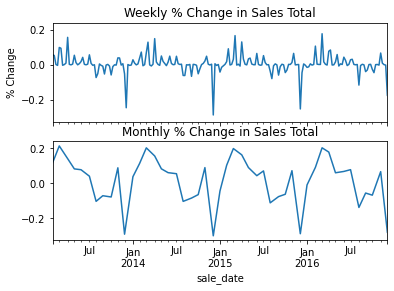

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)

weekly = y.resample('W').mean()
(weekly.diff() / weekly.shift()).plot(ax=ax1)
ax1.set(title='Weekly % Change in Sales Total', ylabel='% Change', xlabel='')

monthly = y.resample('M').mean()
(monthly.diff() / monthly.shift()).plot(ax=ax2)
ax2.set(title='Monthly % Change in Sales Total')
# ax2.hlines(0, *ax2.get_xlim())

In [14]:

y.resample('W').mean()

sale_date
2013-01-06    163.589167
2013-01-13    159.981203
2013-01-20    157.946720
2013-01-27    158.545383
2013-02-03    167.585014
                 ...    
2016-12-04    263.768997
2016-12-11    228.559894
2016-12-18    229.298643
2016-12-25    229.231000
2017-01-01    220.279177
Freq: W-SUN, Name: sales_total, Length: 209, dtype: float64

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

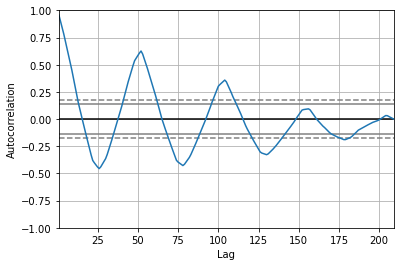

In [15]:
# Autocorrelation after weekly resampling:

pd.plotting.autocorrelation_plot(y.resample('W').mean())

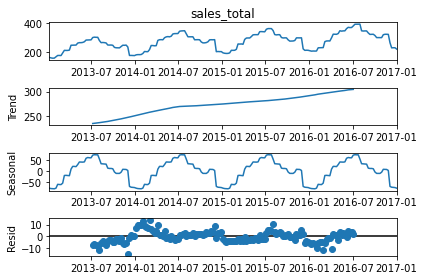

In [16]:
# decompose the data
sm.tsa.seasonal_decompose(y.resample('W').mean()).plot()
None

***

***

## German electrical grid data as gdf

In [18]:
gdf = acquire.get_opsd_german_data()

In [19]:
gdf = prepare.prep_opsd_data(gdf)

In [20]:
gdf

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,01-Jan,2006
2006-01-02,1380.52100,0.000,0.000,0.000,01-Jan,2006
2006-01-03,1442.53300,0.000,0.000,0.000,01-Jan,2006
2006-01-04,1457.21700,0.000,0.000,0.000,01-Jan,2006
2006-01-05,1477.13100,0.000,0.000,0.000,01-Jan,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12-Dec,2017
2017-12-28,1299.86398,506.424,14.162,520.586,12-Dec,2017
2017-12-29,1295.08753,584.277,29.854,614.131,12-Dec,2017


In [23]:
# split the data:    
train = gdf[:'2016']

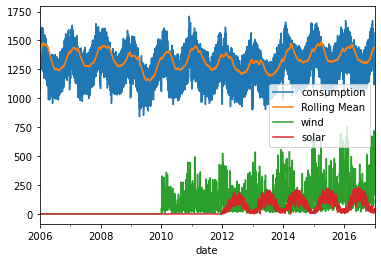

In [26]:
# plot the consumption, wind and solar data

train.consumption.plot(label="consumption")
plt.plot(train['consumption'].rolling('90D').mean(), label="Rolling Mean")
train.wind.plot()
train.solar.plot()
plt.legend()

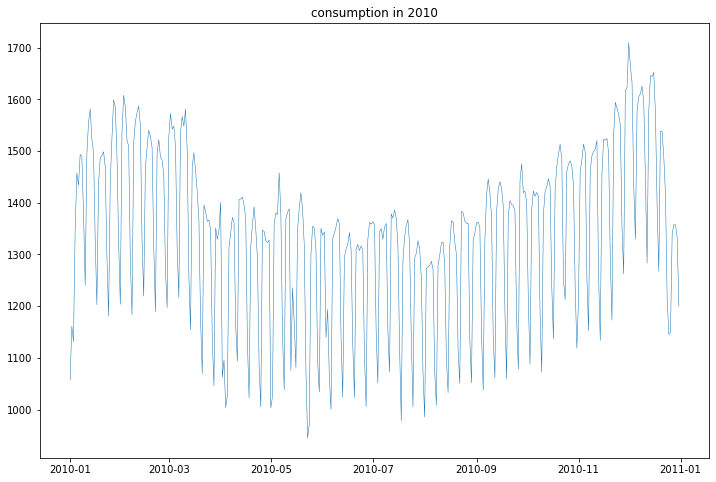

In [27]:
# lets look at consumption in a single year and see if we see any pattern
plt.figure(figsize=(12,8))
plt.plot(train.loc['2010-01':'2010-12']['consumption'], linewidth = 0.5)
plt.title("consumption in 2010")
plt.show()

<AxesSubplot:xlabel='date'>

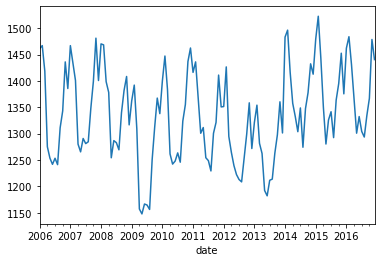

In [28]:
# resample monthly and plot

train.consumption.resample('M').mean().plot()

(1100.0, 1400.0)

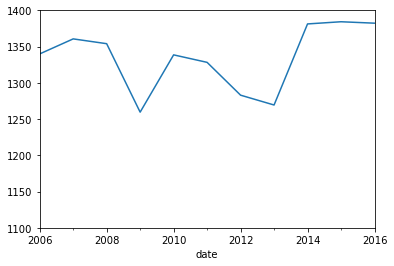

In [29]:
# resample data on yearly basis and plot
train.consumption.resample('Y').mean().plot()
plt.ylim(1100,1400)

In [30]:
# lets fill all NaNs with zero
train = train.fillna(0)

In [32]:
# make a new datafrsame sources
sources = train[['consumption', 'wind', 'solar']]

# make a new column called conventional: Consumption - Wind - Solar
sources['conventional'] = sources.consumption - sources.wind - sources.solar

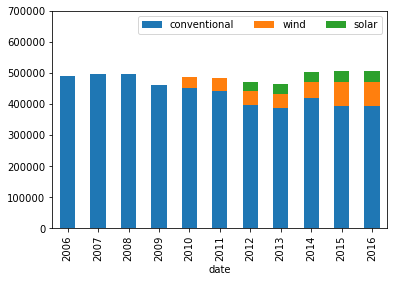

In [33]:
# lets plot the three power sources as stacked bar chart:

ax = sources[['conventional', 'wind', 'solar']].resample('Y').sum().plot.bar(stacked = True)
ax.set_ylim(0, 700000)
ax.legend(ncol = 3)

labels = [pd.to_datetime(t.get_text()).strftime('%Y') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels);

<AxesSubplot:xlabel='date'>

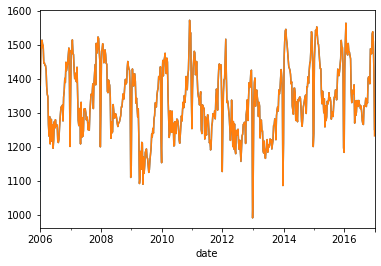

In [34]:

train.consumption.resample('W').mean().plot()
train.consumption.rolling(7).mean().plot()

In [35]:
train['month'] = train.index.month
train['weekday'] = train.index.day_name()

<AxesSubplot:xlabel='month', ylabel='consumption'>

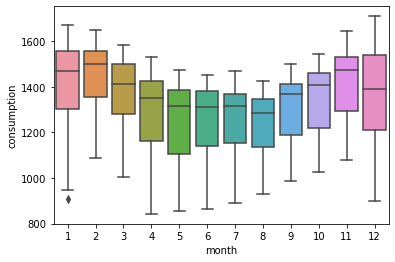

In [36]:
# Energy consumption by month
sns.boxplot(data = train, x = 'month', y = 'consumption')

<AxesSubplot:xlabel='weekday', ylabel='consumption'>

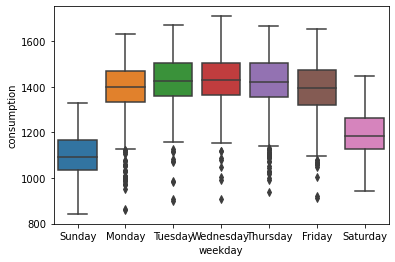

In [37]:
# Energy consumption by weekday
sns.boxplot(data = train, x = 'weekday', y = 'consumption')

In [38]:
y = train.consumption
table = y.groupby([y.index.strftime('%Y'), y.index.strftime('%m-%b')]).mean().unstack(0)

table.head()

date,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
date,,,,,,,,,,,
01-Jan,1461.442065,1467.058032,1470.373484,1362.255613,1400.041677,1416.290581,1351.441226,1321.194935,1483.261323,1479.451968,1462.199355
02-Feb,1467.106893,1434.484357,1468.486207,1392.155179,1447.322536,1436.212607,1426.666241,1354.087429,1496.465536,1522.838964,1484.005138
03-Mar,1418.649161,1400.909871,1398.653258,1309.222387,1383.865226,1366.989516,1294.748258,1281.671581,1416.458355,1443.586774,1431.122710
04-Apr,1275.058900,1280.133167,1378.243233,1157.006367,1261.505467,1300.732300,1264.427000,1262.359967,1357.582700,1350.108400,1364.843867
05-May,1253.488484,1265.436000,1254.194226,1147.650742,1242.220129,1311.608290,1239.388710,1192.123032,1332.490710,1280.312677,1300.866677


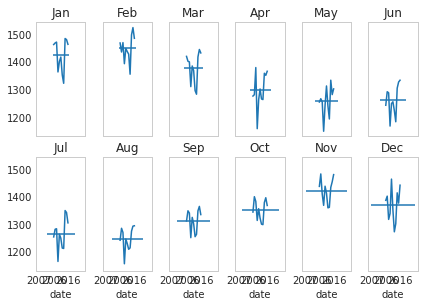

In [39]:
# lets make a subseasonal plot
with plt.style.context('seaborn-whitegrid'):
    fig, axs = plt.subplots(2, 6, sharex=True, sharey=True)

fig.subplots_adjust(wspace=0)
fig.tight_layout()
for ax, (month, x) in zip(axs.ravel(), table.T.iteritems()):
    x.plot(ax=ax, title=month[3:])
    ax.hlines(x.mean(), *ax.get_xlim())

[Text(0.5, 1.0, 'Wind production pattern')]

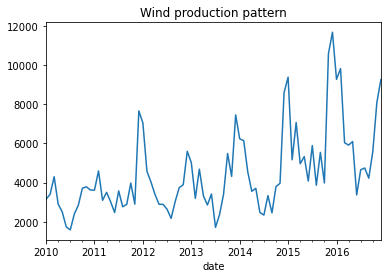

In [40]:
# How does the wind production/consumption vary within a year and also year to year?

ax = train['2010':].wind.resample('M').sum().plot()
ax.set(title = 'Wind production pattern')

[Text(0.5, 1.0, 'Solar production pattern')]

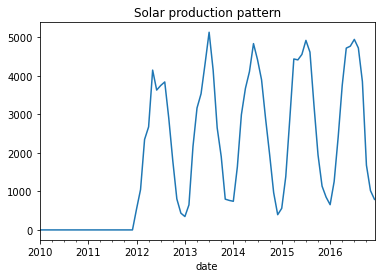

In [41]:
# How does the solar production/consumption vary within a year and also year to year?


ax = train['2010':].solar.resample('M').sum().plot()
ax.set(title = 'Solar production pattern')

In [42]:
# bring in the GDP growth rate data

growth_rate = {2006:3.815, 2007:2.984, 2008:0.962, 2009:-5.697, 2010:4.179, 2011:3.924, 2012:0.42, 2013:0.428, 2014:2.226 , 2015:1.74 , 2016:2.23 , 2017:2.465 }


In [44]:
# convert dict to dataframe
growth_rate = pd.DataFrame.from_dict(growth_rate, orient='index', columns = ['growth_rate'])
growth_rate.head()

,growth_rate
2006,3.815
2007,2.984
2008,0.962
2009,-5.697
2010,4.179


In [45]:
# set index as datetimeindex
growth_rate.index = pd.to_datetime(growth_rate.index, format = '%Y' )


In [46]:

# check the dataframe hear
growth_rate.head()

,growth_rate
2006-01-01,3.815
2007-01-01,2.984
2008-01-01,0.962
2009-01-01,-5.697
2010-01-01,4.179


Text(0, 0.5, 'Growth Rate')

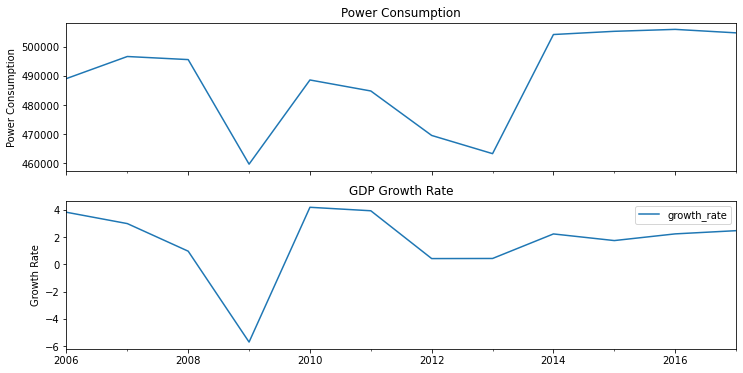

In [48]:
# compare power consumption and GDP growth rate:

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16, 9))

ax = gdf.consumption.resample('Y').sum().plot(figsize = (12,6), ax = ax1)
ax1.set(title='Power Consumption')
ax1.set_ylabel('Power Consumption')

growth_rate.plot(ax =ax2)
ax2.set(title='GDP Growth Rate')
ax2.set_ylabel('Growth Rate')

In [49]:
decomposition = sm.tsa.seasonal_decompose(train.resample('W').consumption.mean(), model='additive')

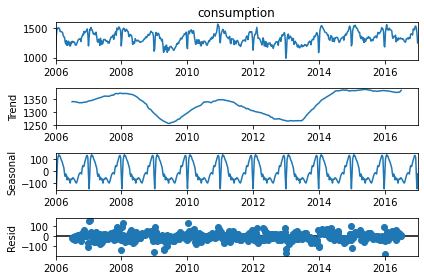

In [50]:
decomposition.plot()
None

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

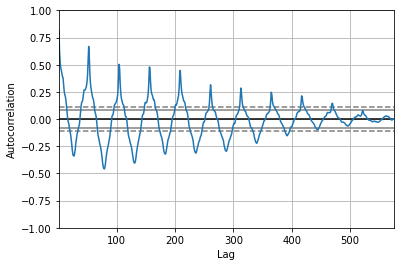

In [51]:
# autocorrelation plot 
pd.plotting.autocorrelation_plot(train.consumption.resample('W').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

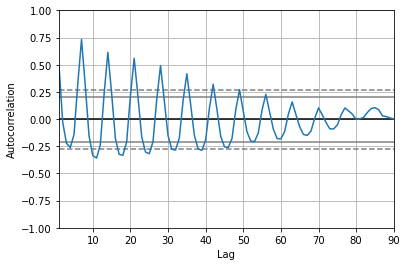

In [52]:
# Is there a weekly seasonality in this data?
pd.plotting.autocorrelation_plot(train.consumption['2010-01': '2010-03'])